# 第４回　Pythonライブラリの利用、簡単な可視化

これまでにも、Pythonライブラリのうち、NumPyを使ってきました。今回は、グラフの描画のためのMatplotlibとそれを使ったグラフの描きかたを扱います。

また、モジュールのリスト・インストール・アップデート・アンインストールをおこなうpipをJupyter notebookから使えることを示します。

## Matplotlib

e-Statのサイトから、「消費者物価指数」統計のうち、「持家の帰属家賃を除く総合指数　前年度比（1948年度～最新年度）」（ファイル名：zdy2020r.csv）をダウンロードしました。これの、9行めからがデータで、１カラムめが年、２カラムめが前年度比物価上昇率（％）です。

第３回でおこなったように、これを読み込みましょう。

In [1]:
import numpy as np
x = np.genfromtxt('zdy2020r.csv', delimiter=',', skip_header=8,encoding="shift_jis")
# 文字コードに注意。

In [2]:
x

array([[ 1.948e+03,  6.880e+01],
       [ 1.949e+03,  1.650e+01],
       [ 1.950e+03, -4.000e+00],
       [ 1.951e+03,  1.970e+01],
       [ 1.952e+03,  3.600e+00],
       [ 1.953e+03,  8.100e+00],
       [ 1.954e+03,  4.000e+00],
       [ 1.955e+03, -1.300e+00],
       [ 1.956e+03,  1.300e+00],
       [ 1.957e+03,  2.500e+00],
       [ 1.958e+03, -4.000e-01],
       [ 1.959e+03,  1.800e+00],
       [ 1.960e+03,  3.800e+00],
       [ 1.961e+03,  6.200e+00],
       [ 1.962e+03,  6.700e+00],
       [ 1.963e+03,  6.600e+00],
       [ 1.964e+03,  4.600e+00],
       [ 1.965e+03,  6.400e+00],
       [ 1.966e+03,  4.700e+00],
       [ 1.967e+03,  4.200e+00],
       [ 1.968e+03,  4.900e+00],
       [ 1.969e+03,  6.400e+00],
       [ 1.970e+03,  7.300e+00],
       [ 1.971e+03,  5.700e+00],
       [ 1.972e+03,  5.200e+00],
       [ 1.973e+03,  1.610e+01],
       [ 1.974e+03,  2.180e+01],
       [ 1.975e+03,  1.040e+01],
       [ 1.976e+03,  9.400e+00],
       [ 1.977e+03,  6.700e+00],
       [ 1

このように、１列目が年、２列目が物価上昇率、となっています。

第３回でおこなったように、データの個数をlen()関数で調べてみます。

In [2]:
len(x)

73

また、第３回でおこなったように、欠けている年を探してみましたが、ありませんでした（コードは同じなので省略）

In [8]:
col_year = x[:,0]
year_min = int(min(col_year))
year_max = int(max(col_year))
year_range = range(year_min, year_max)
for year in year_range:
    if year not in col_year:
        print(year)

前年度比物価上昇率（％）の年次推移をグラフ化してみましょう。

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

In [30]:
x[:,0] #1列め

array([1948., 1949., 1950., 1951., 1952., 1953., 1954., 1955., 1956.,
       1957., 1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965.,
       1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974.,
       1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983.,
       1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992.,
       1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019.,
       2020.])

In [31]:
x[:,1] #2列め

array([68.8, 16.5, -4. , 19.7,  3.6,  8.1,  4. , -1.3,  1.3,  2.5, -0.4,
        1.8,  3.8,  6.2,  6.7,  6.6,  4.6,  6.4,  4.7,  4.2,  4.9,  6.4,
        7.3,  5.7,  5.2, 16.1, 21.8, 10.4,  9.4,  6.7,  3.4,  4.8,  7.8,
        4. ,  2.4,  1.9,  2.2,  1.9, -0.3,  0.3,  0.6,  2.9,  3.3,  2.9,
        1.4,  1.1,  0.2, -0.4,  0.1,  2.2,  0.1, -0.6, -0.7, -1.3, -0.7,
       -0.2,  0. , -0.3,  0.3,  0.4,  1.3, -1.9, -0.4,  0. , -0.3,  1.1,
        3.5,  0.3,  0. ,  0.9,  0.9,  0.6, -0.3])

In [4]:
x1 = x[:,0]

In [5]:
x2 = x[:,1]

Text(0.5, 1.0, 'Inflation rates, 1948 - 2020')

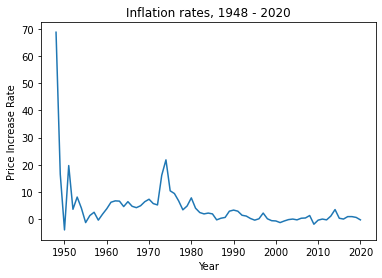

In [6]:
plt.plot(x1,x2)
plt.xlabel('Year')
plt.ylabel('Price Increase Rate')
plt.title('Inflation rates, 1948 - 2020')

物価上昇率は、時々高いときもありますが、特に1990年以降は、落ち着いているように見えます。全期間における物価上昇率の分布を、ヒストグラムで視覚化してみましょう。

(array([43., 25.,  2.,  2.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-4.  ,  3.28, 10.56, 17.84, 25.12, 32.4 , 39.68, 46.96, 54.24,
        61.52, 68.8 ]),
 <BarContainer object of 10 artists>)

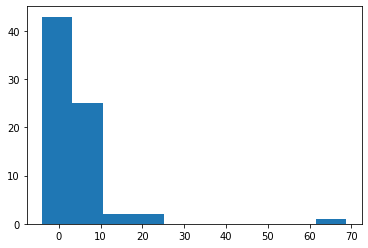

In [6]:
plt.hist(x2)

区間(bin)の数を20にしてみましょう。

(array([10., 33., 20.,  5.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-4.  , -0.36,  3.28,  6.92, 10.56, 14.2 , 17.84, 21.48, 25.12,
        28.76, 32.4 , 36.04, 39.68, 43.32, 46.96, 50.6 , 54.24, 57.88,
        61.52, 65.16, 68.8 ]),
 <BarContainer object of 20 artists>)

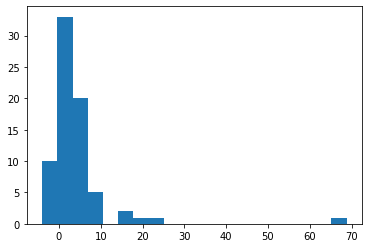

In [6]:
plt.hist(x2, bins=20)

binsを、-5から70までの5区切りにしてみましょう。-5から70まで5ずつ増えていくリストを作るためにrange()の代わりにnumpy.arange()を使ってみましょう。

(array([15., 40., 12.,  1.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([-5,  0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]),
 <BarContainer object of 15 artists>)

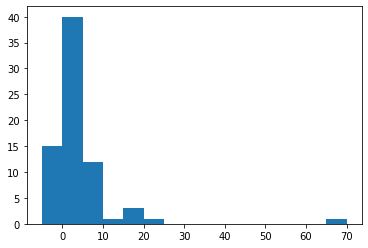

In [12]:
z = np.arange(-5,75,5)
plt.hist(x2, bins=z)

さて、なぜこのデータを用いたかというと、２０２１年の「統計検定２級」の第１問に採用されたからです。問題自体は、最初の折れ線グラフからデータの分布の特徴をいうというものでした。この検定は、統計学の学習の成果を見るためにちょうどよいので、みなさんもぜひ「統計検定２級」の問題集をご覧になってみてください。

次は、散布図を描いてみましょう。データは、前回使った、年ごとの出生率と死亡率を使います。

In [13]:
bd_data = np.genfromtxt('year_birth_death.csv', delimiter=',', skip_header=1,encoding="utf-8_sig")

In [23]:
bd_data[0:15,:]

array([[1899. ,   32. ,   21.5],
       [1900. ,   32.4,   20.8],
       [1901. ,   33.9,   20.9],
       [1902. ,   33.6,   21.3],
       [1903. ,   32.7,   20.4],
       [1904. ,   31.2,   20.7],
       [1905. ,   31.2,   21.6],
       [1906. ,   29.6,   20.3],
       [1907. ,   34. ,   21.4],
       [1908. ,   34.7,   21.5],
       [1909. ,   34.9,   22.5],
       [1910. ,   34.8,   21.6],
       [1911. ,   35.1,   20.9],
       [1912. ,   34.4,   20.5],
       [1913. ,   34.3,   20. ]])

In [24]:
br = bd_data[:,1] #出生率は２列目

In [26]:
dr = bd_data[:,2] #死亡率は３列目

Text(0, 0.5, 'Death rate')

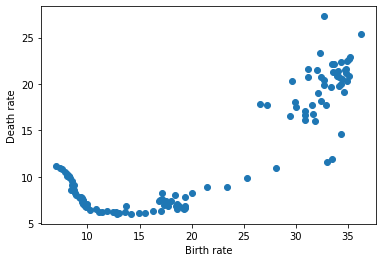

In [29]:
plt.scatter(br,dr) #X軸は出生率、y軸は死亡率
plt.xlabel('Birth rate')
plt.ylabel('Death rate')

グラフからわかるように、単純な関係ではなさそうです。また、異なった傾向をもつデータの集団が、いくつか見えます。さらなる分析は、テキスト「Pythonによる統計分析入門」の176頁からをご覧ください。

## モジュールの有無の調査と追加インストール

ここからは、みなさんとはPythonのインストール状況が違うかもしれませんので、同じ命令を実行しても同じ結果にならない可能性があることをご了承ください。

統計データ処理パッケージ「Pandas」をインポートしてみたところ次のようなエラーメッセージが出ました。

In [1]:
import pandas as pd

ImportError: cannot import name 'read_sas' from 'pandas.io.sas' (unknown location)

また、統計モデル解析パッケージ「Statsmodels」のモジュールをインポートしようとしたところ、statsmodel自体がインストールされていないという趣旨のエラーメッセージが出ました。

In [10]:
import statsmodels.formula.api as smf

ModuleNotFoundError: No module named 'statsmodels'

次も同様に、statsmodelsのモジュールのインポートを行うコマンドと、エラーメッセージです。

In [6]:
import statsmodels.formula.api as smf

ModuleNotFoundError: No module named 'statsmodels'

上２つのエラーメッセージから、statsmodelsがインストールされていないことがわかりますので、statsmodelsをインストールします。そのために、pipを使います。

In [9]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: packaging>=21.3 in e:\pythonusb\pythonusb\python\python-3.9.9\lib\site-packages (from statsmodels) (21.3)



You should consider upgrading via the 'E:\PythonUSB\PythonUSB\Python\python-3.9.9\pythonw.exe -m pip install --upgrade pip' command.


実行が終わったら[]内が「\*」から番号にかわりました。ここで、pip listによってインストールされているすべてのパッケージを一覧できます。

In [8]:
pip list

Package             Version
------------------- ---------
anyio               3.4.0
argon2-cffi         21.1.0
Note: you may need to restart the kernel to use updated packages.
attrs               21.2.0


You should consider upgrading via the 'E:\PythonUSB\PythonUSB\Python\python-3.9.9\pythonw.exe -m pip install --upgrade pip' command.


Babel               2.9.1
backcall            0.2.0
beautifulsoup4      4.10.0
bleach              4.1.0
certifi             2021.10.8
cffi                1.15.0
charset-normalizer  2.0.8
colorama            0.4.4
cycler              0.11.0
debugpy             1.5.1
decorator           5.1.0
defusedxml          0.7.1
entrypoints         0.3
et-xmlfile          1.1.0
fonttools           4.28.2
idna                3.3
ipykernel           6.5.1
ipython             7.29.0
ipython-genutils    0.2.0
Jinja2              3.0.3
json5               0.9.6
jsonschema          4.2.1
jupyter-client      7.1.0
jupyter-core        4.9.1
jupyter-server      1.12.0
jupyterlab          3.2.4
jupyterlab-pygments 0.1.2
jupyterlab-server   2.8.2
kiwisolver          1.3.2
MarkupSafe          2.0.1
matplotlib          3.5.0
matplotlib-inline   0.1.3
mistune             0.8.4
nbclassic           0.3.4
nbclient            0.5.9
nbconvert           6.3.0
nbformat            5.1.3
nest-asyncio        1.5.1
notebo

statsmodelsが表示されないので、ノートブックを保存してJupyter Notebookを終了し、再び起動してから、再度pip listします。

In [1]:
pip list

Package             Version
------------------- ---------
anyio               3.4.0
argon2-cffi         21.1.0
attrs               21.2.0
Babel               2.9.1
backcall            0.2.0
beautifulsoup4      4.10.0
bleach              4.1.0
certifi             2021.10.8
cffi                1.15.0
charset-normalizer  2.0.8
colorama            0.4.4
cycler              0.11.0
debugpy             1.5.1
decorator           5.1.0
defusedxml          0.7.1
entrypoints         0.3
et-xmlfile          1.1.0
fonttools           4.28.2
idna                3.3
ipykernel           6.5.1
ipython             7.29.0
ipython-genutils    0.2.0
Jinja2              3.0.3
json5               0.9.6
jsonschema          4.2.1
jupyter-client      7.1.0
jupyter-core        4.9.1
jupyter-server      1.12.0
jupyterlab          3.2.4
jupyterlab-pygments 0.1.2
jupyterlab-server   2.8.2
kiwisolver          1.3.2
MarkupSafe          2.0.1
matplotlib          3.5.0
matplotlib-inline   0.1.3
mistune             0.8.

You should consider upgrading via the 'E:\PythonUSB\PythonUSB\Python\python-3.9.9\pythonw.exe -m pip install --upgrade pip' command.


今度はstatsmodelsが表示されました。それでは、さきほどエラーメッセージの出た、statsmodelsのモジュールをインポートしましょう。

まずは、どっちみち使いますのでnumpyをインポートします。

In [2]:
import numpy as np

次にstatsmodels.apiモジュールをインポートしようとしましたが、エラーメッセージが出ました。

In [3]:
import statsmodels.api as sm

ImportError: cannot import name 'read_sas' from 'pandas.io.sas' (unknown location)

statsmodelsの別のモジュールの場合も同様でした。

In [4]:
import statsmodels.formula.api as smf

ImportError: cannot import name 'read_sas' from 'pandas.io.sas' (unknown location)

これら２つのエラーメッセージは、pandasパッケージのモジュールが原因だと考えられます。

さらに、次のような、statsmodels.apiモジュールを使う命令（statsmodelsのマニュアルのIntroductionから）を実行させようとしても、statsmodels.apiは、さっきインポートしたつもりっだのに、実はまだインポートされていないことを意味するエラーメッセージが出ました。

In [5]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

NameError: name 'sm' is not defined

Pandasが原因で、statsmodelsが正しく構成できていないため、インポートがうまくいかなかった可能性があります。そこで、pandasパッケージの情報をpip showで確認します。バージョンが1.3.4とわかります。

In [6]:
pip show pandas

Name: pandasNote: you may need to restart the kernel to use updated packages.
Version: 1.3.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team

Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: e:\pythonusb\pythonusb\python\python-3.9.9\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: seaborn, statsmodels


対策として、pandasをアップデートしたらどうかと考えました。そこで、outdatedなパッケージの一覧をpip list -oで表示します。

In [7]:
pip list -o

Package             Version Latest      Type
------------------- ------- ----------- -----
anyio               3.4.0   3.5.0       wheel
argon2-cffi         21.1.0  21.3.0      wheel
attrs               21.2.0  21.4.0      wheel
Babel               2.9.1   2.10.1      wheel
beautifulsoup4      4.10.0  4.11.1      wheel
bleach              4.1.0   5.0.0       wheel
charset-normalizer  2.0.8   2.0.12      wheel
debugpy             1.5.1   1.6.0       wheel
decorator           5.1.0   5.1.1       wheel
entrypoints         0.3     0.4         wheel
fonttools           4.28.2  4.33.3      wheel
ipykernel           6.5.1   6.13.0      wheel
ipython             7.29.0  8.3.0       wheel
Jinja2              3.0.3   3.1.2       wheel
jsonschema          4.2.1   4.5.1       wheel
jupyter-client      7.1.0   7.3.0       wheel
jupyter-core        4.9.1   4.10.0      wheel
jupyter-server      1.12.0  1.17.0      wheel
jupyterlab          3.2.4   3.4.0       wheel
jupyterlab-pygments 0.1.2   0.2.2  

You should consider upgrading via the 'E:\PythonUSB\PythonUSB\Python\python-3.9.9\pythonw.exe -m pip install --upgrade pip' command.


matplotlib          3.5.0   3.5.2       wheel
mistune             0.8.4   2.0.2       wheel
nbclassic           0.3.4   0.3.7       wheel
nbclient            0.5.9   0.6.2       wheel
nbconvert           6.3.0   6.5.0       wheel
nbformat            5.1.3   5.4.0       wheel
nest-asyncio        1.5.1   1.5.5       wheel
notebook            6.4.6   6.4.11      wheel
numpy               1.21.4  1.22.3      wheel
pandas              1.3.4   1.4.2       wheel
parso               0.8.2   0.8.3       wheel
Pillow              8.4.0   9.1.0       wheel
pip                 21.3.1  22.0.4      wheel
prometheus-client   0.12.0  0.14.1      wheel
prompt-toolkit      3.0.22  3.0.29      wheel
Pygments            2.10.0  2.12.0      wheel
pyparsing           3.0.6   3.0.8       wheel
pyrsistent          0.18.0  0.18.1      wheel
pytz                2021.3  2022.1      wheel
pywin32             302     304         wheel
pywinpty            1.1.6   2.0.5       wheel
requests            2.26.0  2.27.1

確かに、pandasは最新が1.4.2であるところ、この環境では1.3.4になっています。

そこで、pip install -U によって、pandasのupdateを試みました。

In [8]:
pip install -U pandas

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] アクセスが拒否されました。: 'E:\\PythonUSB\\PythonUSB\\Python\\python-3.9.9\\Lib\\site-packages\\pandas\\~libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'E:\PythonUSB\PythonUSB\Python\python-3.9.9\pythonw.exe -m pip install --upgrade pip' command.


  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4


エラーメッセージが出ましたが、ひとつはこれまでも出ている、pipのバージョンについてです。もう一つが気になりますが、とりあえず、pandasのバージョンが上がっているか、一度ノートブックを保存して、Jupyter notebookを終了して再起動してから、pip show pandasで確かめます。

In [9]:
pip show pandas

Name: pandas
Version: 1.4.2
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: e:\pythonusb\pythonusb\python\python-3.9.9\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: seaborn, statsmodels
Note: you may need to restart the kernel to use updated packages.


このように、バージョンが上がっていることが確認できました。

それでは、再度、statsmoodelsのモジュールのインポートを試みます。

In [31]:
import numpy as np

In [32]:
import statsmodels.api as sm

In [33]:
import statsmodels.formula.api as smf

今度はインポートできたようです。以下、前述のIntroductionに書かれた命令を入力してみます。

In [34]:
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

In [35]:
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

In [36]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.90e-08
Time:                        10:46:20   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

このように、実行することができました。

これらの命令と結果の意味するところは、回を改めてお話します。今回は、どのような「データフレーム」ができたのか、見てみましょう。

データフレームとは、列のタイトルも含めた表データです。NumPyの配列（アレイ）と違うところは、列（項目）に名前でアクセスできることです。

In [37]:
dat

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,86,W,Vienne,15010,4710,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49


In [44]:
dat[-5:]

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
81,86,W,Vienne,15010,4710,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49
85,200,NaN,Corse,2199,4589,49,37015,24743,37016,2:Med,...,81,2,84,83,9,25,1,539.213,8680,195.41


In [57]:
dat['Department']

0              Ain
1            Aisne
2           Allier
3     Basses-Alpes
4     Hautes-Alpes
          ...     
81          Vienne
82    Haute-Vienne
83          Vosges
84           Yonne
85           Corse
Name: Department, Length: 86, dtype: object

In [43]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']

In [45]:
df = dat[vars]

In [46]:
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [47]:
df = df.dropna()

In [48]:
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
80,Vendee,68,28,56,W
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
